# Project: Investigate the movies dataset
## Name: Georgios Pallas

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## 1. Introduction

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [6]:
df = pd.read_csv('tmdb-movies.csv')

In [7]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

We can have some first observations regarding the data. We can see that many columns exist in the movies data set. Columns such as movie title, cast, director, production companies, popularity, budget, revenue and others.

It looks like that revenue is an important indicator to measure the sucess of a movie. So I would like to identify these parameters that are related to high revenue. Parametes that I would like to explore include genre, popularity, budget and director.  Another parameter that I can look into is popularity and how it is assossiated with genres.

Moreover, there might be another variable of importance that is not included in the dataset; a profit variable. I can create a new column named profit that is calculated by substracting the budget from the revenue. Because there might be a movie with high revenue. But if the budget of that movie is also very high that means that the profit can be not the large.

Therefore I will explore the following questions:

1. Are popularity, budget, vote count correlated with revenues (adjusted)?
2. Which genres have the highest revenues each year and decade?
3. Which genres have the highest profits each decade?
4. Which are the most popular genres each year?
5. Which directors have the highest revenues?
6. Which directors have the highest and lowest profits?
7. Which directors have the highest budgets?
8. How the top directors with highest revenues are assossiated with the number of movies?


<a id='wrangling'></a>
## 2. Data Wrangling

### 2.1 General Properties

In [9]:
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [11]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


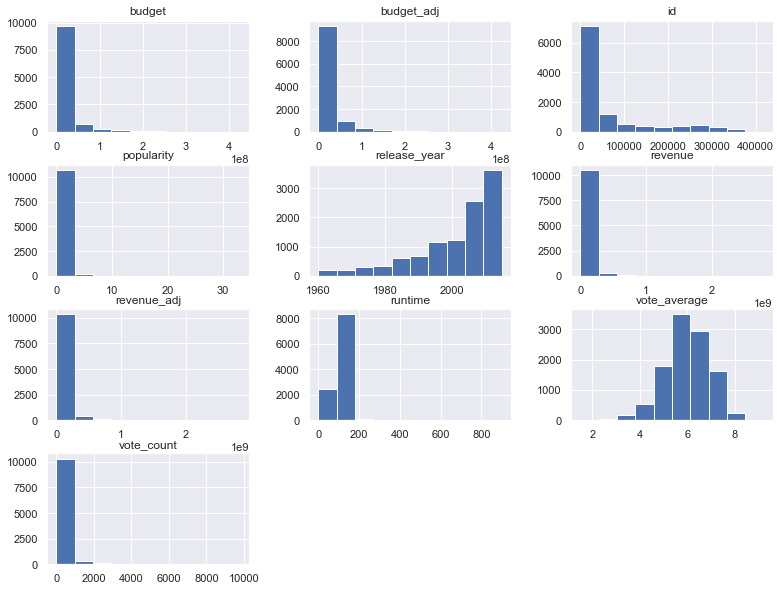

In [12]:
df.hist(figsize=(13,10));

### 2.2 Columns to drop

As I already discussed in the introduction I will explore variables that might be assossiated with high revenues like genre, director, budget, popularity. Some of the columns have no real value in identifying which characteristics of movies are related to high revenues. Such columns are the following: <i>id, imdb_id, runtime, overview, tagline, homepage and keywords</i>. These columns can be dropped from the dataframe. Actually, some of these columns might be interesting to explore, such as the keywords column. Maybe some of the keywords can be identified to have high correlation with revenues or other parameters. That would be interesting to look into at some time. In addition I can drop the columns <i>vote_average and release_date</i>. Instead of the vote_average I can use the column popularity. Also the release_date might have some correlation with revenues or other parameters. However, since this dataset is quite big, I will focus more on characteristics like genres, director, budget, popularity, revenues. I will also drop <i>cast and production_companies</i>, although these two parameters might be highly assosiated with revenues, popularity or other parameters. But I already have enough parameters to perform an exploratory analysis.

We can also observe, that there are 2 additional columns for the budget and revenues. The additional comumns are the values of the movies (in dollars) adjusted to inflation using as a reference year, the year 2010. In order to make a fair comparison between the movies I will also drop the budget and revenue columns and keep only the adjusted budget and revenue columns. In the following code cells we look further into the budget columns.

In [13]:
# We can see that some of the movies have a budget of 150,000,000.

df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [14]:
# We look further if there other instances in which the budget is 150,000,000 and we found 42 in total.

df[df.budget==150000000].count()['budget']

42

In [15]:
df[(df.budget==150000000) & ((df.release_year==2013)|(df.release_year==2015))][['budget','release_year','budget_adj']]

,budget,release_year,budget_adj
0,150000000,2015,1.379999e+08
1,150000000,2015,1.379999e+08
25,150000000,2015,1.379999e+08
73,150000000,2015,1.379999e+08
5422,150000000,2013,1.404050e+08
5489,150000000,2013,1.404050e+08


We can look at the adjusted budgets for different years, e.g. 2013 an 2015. We notice that even though for all these movies the budget was 150,000,000 the adjusted budjet including inflation for the reference year 2010 is different for 2013 and 2015. That is why, in order to have a fair comparison, I will keep only the columns of the adjusted budgets and I will drop the rest. Similar for the revenues.

### 2.3 Missing values

We can also observe that there are missing values for some columns. Some of the columns will be dropped as discussed before. So the columns with missing values that are of interest are: <i> director and genres</i>.

One simple step that I could do is to drop all the missing values. For the cast, director and genres only a few values are missing. But for the production companies is 1030 values (as we can see in the following code cells). This is a large number to drop. But still the dataset is quite big, so I would still have quite many data to perform my analysis. For now I will drop the whole production companies column since I am not going to use it in my analysis.

In [16]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

For future work in which I will look into cast: If I explore the rows to which the cast is null (in the following cell) I notice something interesting.
The budget_adj and the revenue_adj (also budget and revenue) are zero in most cases.
Similar observations regarding budgets we can notice also for the other columns with missing values: director, genres and production companies.
In addition they also miss other values.
These data might be incomplete or erroneous.

In [17]:
df[df.cast.isnull()].head()

#df[df.director.isnull()]
#df[df.genres.isnull()]
#df[df.production_companies.isnull()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,tt4661600,0.422901,0,0,Sanjay's Super Team,NaN,NaN,Sanjay Patel,NaN,...,Sanjay's Super Team follows the daydream of a ...,7,Animation,Pixar Animation Studios,11/25/15,47,6.9,2015,0.0,0.0
441,355020,tt4908644,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,http://www.netflix.com/title/80031666,Evgeny Afineevsky,The Next Generation Of Revolution,...,A documentary on the unrest in Ukraine during ...,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.2,2015,0.0,0.0
465,321109,tt4393514,0.201696,0,0,Bitter Lake,NaN,NaN,Adam Curtis,NaN,...,An experimental documentary that explores Saud...,135,Documentary,BBC,1/24/15,19,7.8,2015,0.0,0.0
536,333350,tt3762974,0.122543,0,0,A Faster Horse,NaN,NaN,David Gelb,NaN,...,David Gelb (Jiro Dreams of Sushi) tackles anot...,90,Documentary,NaN,10/8/15,12,8.0,2015,0.0,0.0
538,224972,tt3983674,0.114264,0,0,The Mask You Live In,NaN,http://themaskyoulivein.org,Jennifer Siebel Newsom,"Is american masculinity harming our boys, men ...",...,"Compared to girls, research shows that boys in...",88,Documentary,NaN,1/1/15,11,8.9,2015,0.0,0.0


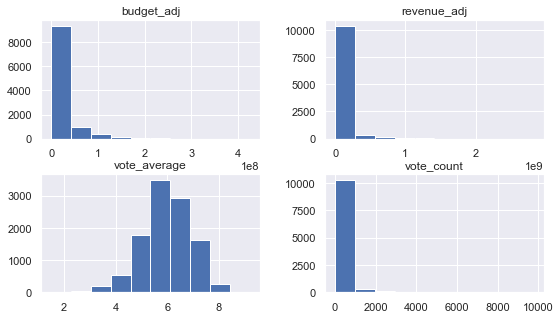

In [18]:
# Distribution of values for the whole dataset for specific characteristics.
df[['budget_adj','revenue_adj','vote_average','vote_count']].hist(figsize=(9,5));

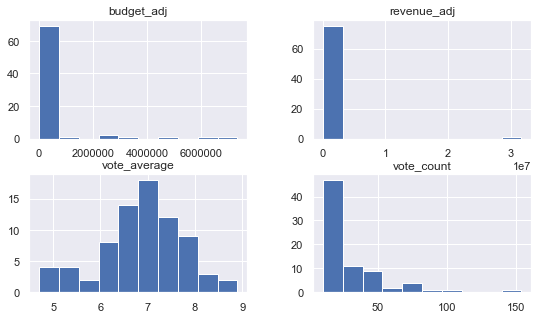

In [19]:
# Distributon of values for dataset when cast is null for specific characteristics.
df[df.cast.isnull()][['budget_adj','revenue_adj','vote_average','vote_count']].hist(figsize=(9,5));

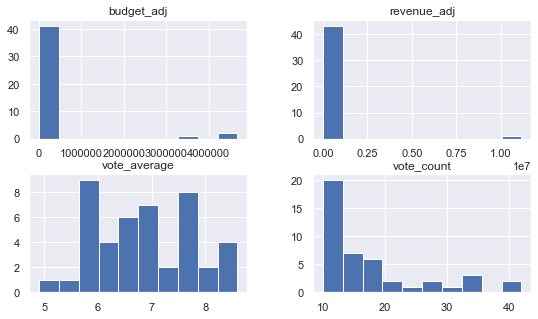

In [20]:
# Distribution of values for dataset when director is null for specific characteristics.
df[df.director.isnull()][['budget_adj','revenue_adj','vote_average','vote_count']].hist(figsize=(9,5));

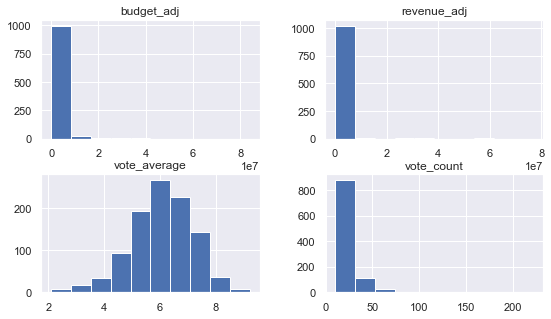

In [21]:
# Distribution of values for dataset when production companies is null for specific characteristics.
df[df.production_companies.isnull()][['budget_adj','revenue_adj','vote_average','vote_count']].hist(figsize=(9,5));

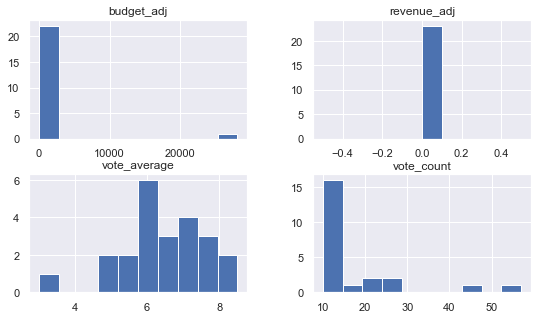

In [22]:
# Distribution of values for dataset when genres is null for specific characteristics.
df[df.genres.isnull()][['budget_adj','revenue_adj','vote_average','vote_count']].hist(figsize=(9,5));

### Additional observations

#### Missing values
When we plot the histograms for specific characteristics - like budget, revenue (adjusted), vote_average and vote_count - we notice that the datasets for cast, genres, director and production_companies when the null values are taken into account have a similar trend (distribution) with the original dataset for the budget and revenue (adjusted) columns. Thus, dropping these values will not really affect the trends. However, this is quite interesting observation. If we look in a number of cells above, when we called the function describe(), we can notice that more than 50% the movies recorded have zero budgets and revenues.

I think this is quite interesting observation, one might suggest that depending which questions we would like to answer we can keep or drop all the movies with zero budget and revenue.

In addition, we notice for the histagrams above that for some cases the vote_average doesn't really follow the general trend. This mainly happens in cases to which the datasets when the director and the genres columns are null. These are only a few observations, 44 and 23 for director and genres missing values respectively. This is a very small sample compared to the thousands of records so dropping these rows shouldn't affect the outcomes of our analysis.


### 2.4 Duplicate values

In [23]:
# We also found on instance of duplicated row.
df.duplicated().sum()

1

In [24]:
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [25]:
# Further explore the duplicated values.
# We can drop one of the instances.
df[df.id==42194]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


### 2.5 Data Cleaning

We discussed before the columns and rows to drop with regard to missing values, duplicated values and usefulness to our exploratory analysis. In the folowing steps we procede with the cleaning. I will drop among others the production companies and cast since I am not going to use it in my analysis.

In [26]:
# drop columns as discussed earlier
df.drop(['runtime','id','imdb_id','overview','tagline','homepage','keywords', 'vote_average', 'release_date', 'budget', 'revenue', 'production_companies', 'cast'], axis=1, inplace=True)

In [27]:
df.head(2)

,popularity,original_title,director,genres,vote_count,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,2015,1.379999e+08,3.481613e+08


In [28]:
# drop duplicated values
df.drop_duplicates(inplace=True)

In [29]:
# check if all duplicated are dropped
df.duplicated().sum().any()

False

In [30]:
# drop missing values
df.dropna(inplace=True)

In [31]:
# check if all missing values are dropped
df.isnull().sum().any()

False

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 8 columns):
popularity        10800 non-null float64
original_title    10800 non-null object
director          10800 non-null object
genres            10800 non-null object
vote_count        10800 non-null int64
release_year      10800 non-null int64
budget_adj        10800 non-null float64
revenue_adj       10800 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 759.4+ KB


In [33]:
# reset the index of the dataframe
df.reset_index(drop=True, inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 8 columns):
popularity        10800 non-null float64
original_title    10800 non-null object
director          10800 non-null object
genres            10800 non-null object
vote_count        10800 non-null int64
release_year      10800 non-null int64
budget_adj        10800 non-null float64
revenue_adj       10800 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 675.1+ KB


<a id='eda'></a>
## 3. Exploratory Data Analysis

Now that the data are cleaned I can proceed to the exploratory analysis, answering the questions stated in the introduction section.

### Research Question 1: Are popularity, budget, vote count correlated with revenues?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


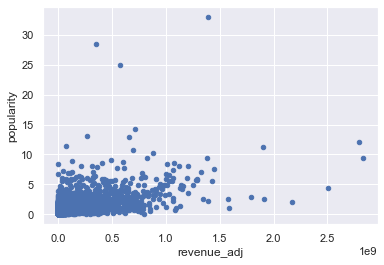

In [35]:
df.plot(x='revenue_adj', y='popularity', kind='scatter');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


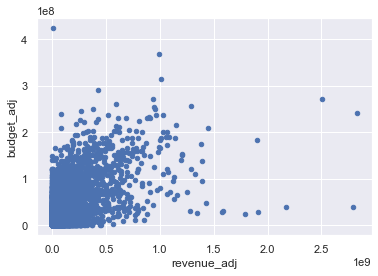

In [36]:
df.plot(x='revenue_adj', y='budget_adj', kind='scatter');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


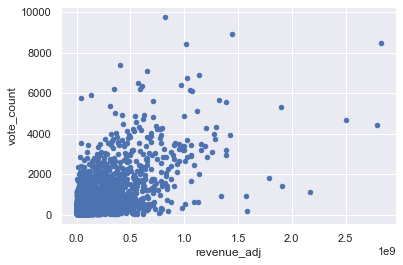

In [37]:
df.plot(x='revenue_adj', y='vote_count', kind='scatter');

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


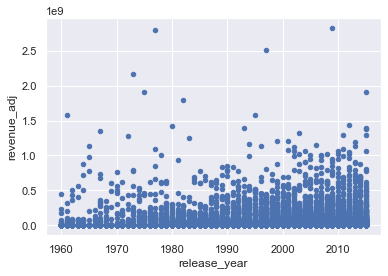

In [38]:
df.plot(y='revenue_adj', x='release_year', kind='scatter');

From the three scatter plots above it looks like the revenue of a movie has some correlation with the three variables: vote_average, budget and popularity. Not so much correlation of the revenue with the relase year can be seen though. To find the exact correlation numbers I can call the related correlation function.

In [39]:
df.corr()

,popularity,vote_count,release_year,budget_adj,revenue_adj
popularity,1.000000,0.800710,0.091352,0.512834,0.608732
vote_count,0.800710,1.000000,0.109144,0.586672,0.707726
release_year,0.091352,0.109144,1.000000,0.018098,-0.065533
budget_adj,0.512834,0.586672,0.018098,1.000000,0.646291
revenue_adj,0.608732,0.707726,-0.065533,0.646291,1.000000


Indeed we can see that revenues are positively correlated with popularity, vote_count and budget. The highest correlation can be found between vote_count and revenues with about 0.7. On the other hand a very small and negative correlation can be found between revenues and release year.

### Research Question 2: Which genres have the highest revenues each year and decade?

Each movie has multiple genres split by the character "|". For that reason I will create a new dataset in which all movies with multiple genres will be split into multiple rows - one row for each genre -.

In [40]:
# split movies with multiple genres to multiple rows. Code from student hub discussions.
DF_Genre = df.join(df.genres.str.strip('|').str.split('|',expand=True).stack().reset_index(level=1,drop=True).rename('genre')).reset_index(drop=True)

In [41]:
# A new column genre has been now created.
DF_Genre.head()

,popularity,original_title,director,genres,vote_count,release_year,budget_adj,revenue_adj,genre
0,32.985763,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,2015,1.379999e+08,1.392446e+09,Action
1,32.985763,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,2015,1.379999e+08,1.392446e+09,Adventure
2,32.985763,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,2015,1.379999e+08,1.392446e+09,Science Fiction
3,32.985763,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,2015,1.379999e+08,1.392446e+09,Thriller
4,28.419936,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,2015,1.379999e+08,3.481613e+08,Action


In [42]:
# I will drop the genres column as I will not use it now.
DF_Genre.drop('genres', axis=1, inplace=True)

In [43]:
DF_Genre.head()

,popularity,original_title,director,vote_count,release_year,budget_adj,revenue_adj,genre
0,32.985763,Jurassic World,Colin Trevorrow,5562,2015,1.379999e+08,1.392446e+09,Action
1,32.985763,Jurassic World,Colin Trevorrow,5562,2015,1.379999e+08,1.392446e+09,Adventure
2,32.985763,Jurassic World,Colin Trevorrow,5562,2015,1.379999e+08,1.392446e+09,Science Fiction
3,32.985763,Jurassic World,Colin Trevorrow,5562,2015,1.379999e+08,1.392446e+09,Thriller
4,28.419936,Mad Max: Fury Road,George Miller,6185,2015,1.379999e+08,3.481613e+08,Action


In [44]:
DF_Genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26864 entries, 0 to 26863
Data columns (total 8 columns):
popularity        26864 non-null float64
original_title    26864 non-null object
director          26864 non-null object
vote_count        26864 non-null int64
release_year      26864 non-null int64
budget_adj        26864 non-null float64
revenue_adj       26864 non-null float64
genre             26864 non-null object
dtypes: float64(3), int64(2), object(3)
memory usage: 1.6+ MB


In [45]:
# number of unique genres in the dataset
DF_Genre.genre.nunique()

20

#### Genres with highest revenues per year

In [46]:
# max revenue values per year per movie. Code from student hub discussions.
temp1 = DF_Genre[DF_Genre.groupby(['release_year']).revenue_adj.transform(max) == DF_Genre.revenue_adj]
temp1.head()

,popularity,original_title,director,vote_count,release_year,budget_adj,revenue_adj,genre
11,11.173104,Star Wars: The Force Awakens,J.J. Abrams,5292,2015,1.839999e+08,1.902723e+09,Action
12,11.173104,Star Wars: The Force Awakens,J.J. Abrams,5292,2015,1.839999e+08,1.902723e+09,Adventure
13,11.173104,Star Wars: The Force Awakens,J.J. Abrams,5292,2015,1.839999e+08,1.902723e+09,Science Fiction
14,11.173104,Star Wars: The Force Awakens,J.J. Abrams,5292,2015,1.839999e+08,1.902723e+09,Fantasy
1395,10.174599,The Hobbit: The Battle of the Five Armies,Peter Jackson,3110,2014,2.302728e+08,8.797523e+08,Adventure


In [47]:
# max genre and revenue grouped by year
temp2 = temp1.groupby(['release_year']).max()[['genre','revenue_adj']]
temp2.head()

,genre,revenue_adj
release_year,,
1960,History,4.423780e+08
1961,Family,1.574815e+09
1962,War,5.045914e+08
1963,Thriller,5.617734e+08
1964,Thriller,8.780804e+08


In [48]:
# creating two indexes release year and gerne to plot genre with highest revenue per year
temp3 = temp2.set_index(['genre'],append=True)
temp3.head()

,,revenue_adj
release_year,genre,
1960,History,4.423780e+08
1961,Family,1.574815e+09
1962,War,5.045914e+08
1963,Thriller,5.617734e+08
1964,Thriller,8.780804e+08


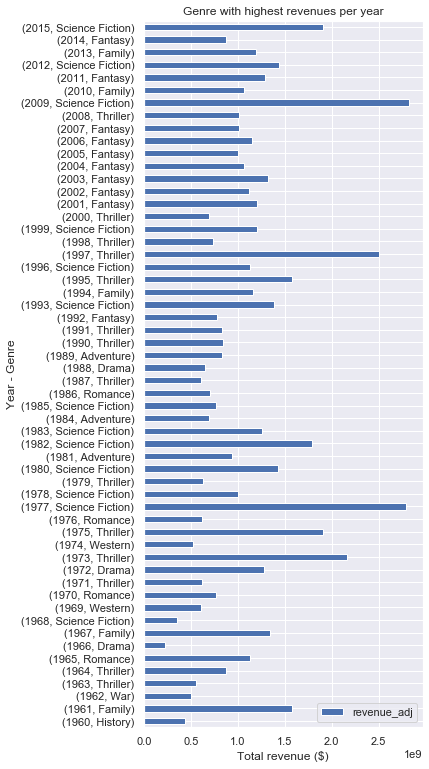

In [49]:
ax = temp3.plot(kind='barh', figsize=(5,13), title="Genre with highest revenues per year")
ax.set_ylabel('Year - Genre')
ax.set_xlabel('Total revenue ($)');

We can see in the above plot the genres which had the higest revenues each year. For example for 2015 Science fiction movies have the highest revenues. I should mention here that this is the result of the sum of revenues for each genre. I could have used the mean value and get a differt result.

In [50]:
temp2.genre.nunique()

10

In [51]:
temp2.genre.unique()

array(['History', 'Family', 'War', 'Thriller', 'Romance', 'Drama',
       'Science Fiction', 'Western', 'Adventure', 'Fantasy'], dtype=object)

It also appears that only 10 genres out of 20 in total result in the highest revenues each year.

#### Genres with highest revenues per decade

Plotting the results for every decade can also be a nice idea. To do that I can create bins for every decade: 1960s, 1970s, ... to 2010s. The last decade will contain the results for the first 6 years only; from 2010 to 2015, given the availability of our data.

In [52]:
# min and max year
DF_Genre.release_year.min(), DF_Genre.release_year.max()

(1960, 2015)

In [53]:
# bin creation
bin_edges = [1959, 1970, 1980, 1990, 2000, 2010, 2015]
bin_names = ['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

In [54]:
# create a new column decade to indicate which decade the movies was released
DF_Genre['decade'] = pd.cut(DF_Genre.release_year, bin_edges, labels=bin_names)

In [55]:
DF_Genre.head(2)

,popularity,original_title,director,vote_count,release_year,budget_adj,revenue_adj,genre,decade
0,32.985763,Jurassic World,Colin Trevorrow,5562,2015,1.379999e+08,1.392446e+09,Action,2010s
1,32.985763,Jurassic World,Colin Trevorrow,5562,2015,1.379999e+08,1.392446e+09,Adventure,2010s


In [56]:
DF_Genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26864 entries, 0 to 26863
Data columns (total 9 columns):
popularity        26864 non-null float64
original_title    26864 non-null object
director          26864 non-null object
vote_count        26864 non-null int64
release_year      26864 non-null int64
budget_adj        26864 non-null float64
revenue_adj       26864 non-null float64
genre             26864 non-null object
decade            26864 non-null category
dtypes: category(1), float64(3), int64(2), object(3)
memory usage: 1.7+ MB


In [57]:
# Taking a look at the sum of revenues groupedby decade and genre.
DF_Genre.groupby(['decade', 'genre']).revenue_adj.sum().head(25)

decade  genre          
1960s   Action             7.539376e+09
        Adventure          1.058939e+10
        Animation          3.233059e+09
        Comedy             5.785243e+09
        Crime              2.216295e+09
        Documentary        0.000000e+00
        Drama              1.305015e+10
        Family             5.912503e+09
        Fantasy            7.778355e+08
        Foreign            0.000000e+00
        History            3.031061e+09
        Horror             5.500851e+08
        Music              3.228879e+09
        Mystery            1.309865e+09
        Romance            5.906236e+09
        Science Fiction    7.573340e+08
        TV Movie           0.000000e+00
        Thriller           5.667280e+09
        War                3.379447e+09
        Western            1.529703e+09
1970s   Action             1.657539e+10
        Adventure          1.508984e+10
        Animation          5.603044e+08
        Comedy             8.748182e+09
        Crime   

In [58]:
# For every decade I will split the sum of revenues grouped by decade and genre.
a = DF_Genre.groupby(['decade', 'genre']).revenue_adj.sum()[100:]
b = DF_Genre.groupby(['decade', 'genre']).revenue_adj.sum()[80:100]
c = DF_Genre.groupby(['decade', 'genre']).revenue_adj.sum()[60:80]
d = DF_Genre.groupby(['decade', 'genre']).revenue_adj.sum()[40:60]
e = DF_Genre.groupby(['decade', 'genre']).revenue_adj.sum()[20:40]
f = DF_Genre.groupby(['decade', 'genre']).revenue_adj.sum()[0:20]

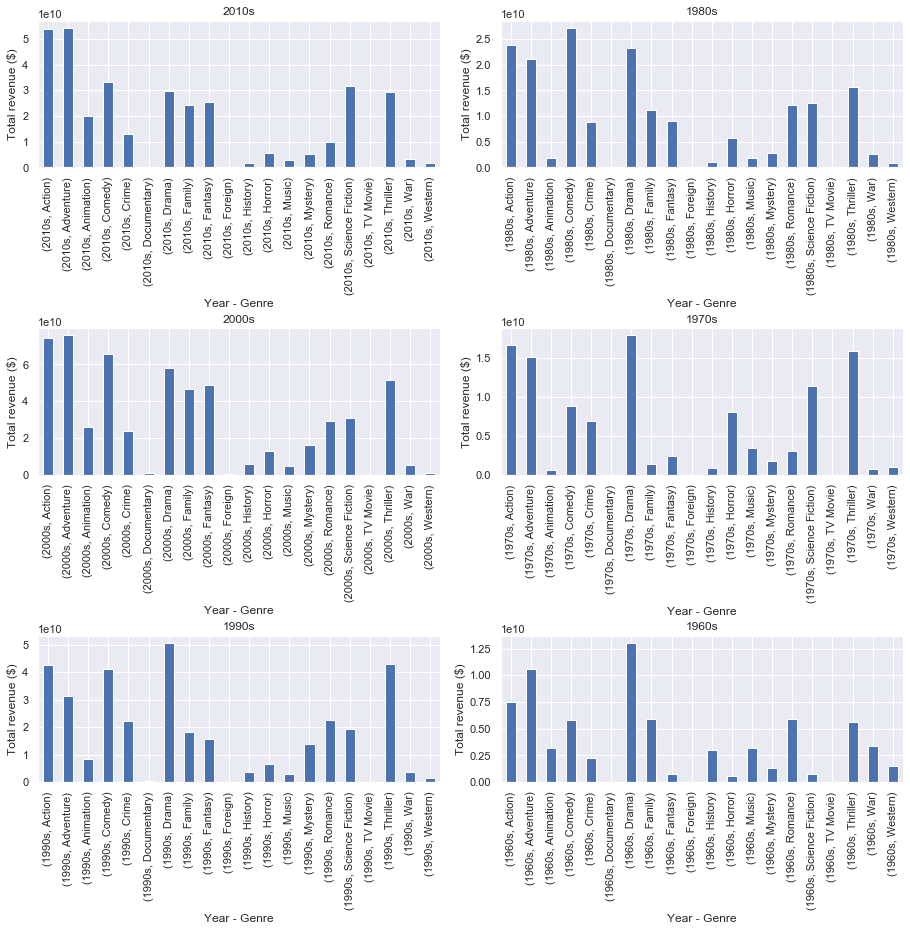

In [59]:
# Plot
fig, axes = plt.subplots(3, 2)
fig.subplots_adjust(hspace=1.1, wspace=0.15)

a.plot(ax=axes[0,0], kind='bar', figsize=(15.5,14), title='2010s')
b.plot(ax=axes[1,0], kind='bar', title='2000s')
c.plot(ax=axes[2,0], kind='bar', title='1990s')
d.plot(ax=axes[0,1], kind='bar', title='1980s')
e.plot(ax=axes[1,1], kind='bar', title='1970s')
f.plot(ax=axes[2,1], kind='bar', title='1960s')

for ax in axes.flat:
    ax.set(xlabel='Year - Genre', ylabel='Total revenue ($)');

By plotting the total revenues of genres per decade we can see more clear which genres create the most revenues.
For example, for 2010 decade, Action and Adventure were the genres with the highest revenues. While for 1980 decede, Comedy genre had the highest revenues followed by Action and Drama.

It is also interesting to see these results how they compare with the yearly results in the earlier plot. We can see from the previous plot that the genres with the highest revenues for 2010 to 2015 were the following:
2010: Family
2011: Fantasy
2012: Science Fiction
2013: Family
2014: Fantasy
2015: Science Fiction

While the cumulative results for the decade plotted above suggest the Action and Adventure were genres with highest revenues while family is far behind. The reason for that more likely is that many more movies Action and Adventure are released resulting in high revenues.

This is something we can check:

In [60]:
# number of movies of each genre for the 2010 decade
DF_Genre[(DF_Genre.release_year == 2015)|(DF_Genre.release_year == 2014)|(DF_Genre.release_year == 2013)|(DF_Genre.release_year == 2012)|(DF_Genre.release_year == 2011)|(DF_Genre.release_year == 2010)].genre.value_counts()

Drama              1451
Comedy             1032
Thriller            964
Action              675
Horror              592
Romance             442
Adventure           371
Science Fiction     362
Crime               338
Documentary         316
Family              301
Animation           249
Fantasy             229
Mystery             219
Music               137
History              78
TV Movie             72
War                  65
Foreign              33
Western              28
Name: genre, dtype: int64

Indeed we can see that many more Action and Adventure genres were released than Family. However, we can also see something interesting. Many more Drama and Comedy movies were released from 2010 to 2015. But their revenues, although they are high, they are not close to those of Action and Adventure. That might suggest the revenues of these genres - Drama and Comedy - are not that high. A more detailed analysis to that, e.g. using mean values could be an option. 

### Research Question 3: Which genres have the highest profits each decade?

It we be interesting also to look into profits and not just reveneus. For that we will create a new column profit as described in the introduction section. And we will follow the same steps as with revenue.

In [61]:
DF_Genre['profit'] = DF_Genre.revenue_adj - DF_Genre.budget_adj

In [62]:
DF_Genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26864 entries, 0 to 26863
Data columns (total 10 columns):
popularity        26864 non-null float64
original_title    26864 non-null object
director          26864 non-null object
vote_count        26864 non-null int64
release_year      26864 non-null int64
budget_adj        26864 non-null float64
revenue_adj       26864 non-null float64
genre             26864 non-null object
decade            26864 non-null category
profit            26864 non-null float64
dtypes: category(1), float64(4), int64(2), object(3)
memory usage: 1.9+ MB


In [63]:
DF_Genre.describe()

,popularity,vote_count,release_year,budget_adj,revenue_adj,profit
count,26864.000000,26864.000000,26864.000000,2.686400e+04,2.686400e+04,2.686400e+04
mean,0.707988,250.782720,2000.675886,2.110920e+07,6.109446e+07,3.998526e+07
std,1.116378,638.957858,12.770128,3.824605e+07,1.617655e+08,1.402533e+08
min,0.000188,10.000000,1960.000000,0.000000e+00,0.000000e+00,-4.139124e+08
25%,0.225678,18.000000,1994.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.412474,44.000000,2005.000000,5.041001e+03,0.000000e+00,0.000000e+00
75%,0.777600,174.000000,2011.000000,2.714315e+07,4.402879e+07,1.919007e+07
max,32.985763,9767.000000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


In [64]:
DF_Genre.head()

,popularity,original_title,director,vote_count,release_year,budget_adj,revenue_adj,genre,decade,profit
0,32.985763,Jurassic World,Colin Trevorrow,5562,2015,1.379999e+08,1.392446e+09,Action,2010s,1.254446e+09
1,32.985763,Jurassic World,Colin Trevorrow,5562,2015,1.379999e+08,1.392446e+09,Adventure,2010s,1.254446e+09
2,32.985763,Jurassic World,Colin Trevorrow,5562,2015,1.379999e+08,1.392446e+09,Science Fiction,2010s,1.254446e+09
3,32.985763,Jurassic World,Colin Trevorrow,5562,2015,1.379999e+08,1.392446e+09,Thriller,2010s,1.254446e+09
4,28.419936,Mad Max: Fury Road,George Miller,6185,2015,1.379999e+08,3.481613e+08,Action,2010s,2.101614e+08


In [65]:
aa = DF_Genre.groupby(['decade', 'genre']).profit.sum()[100:]
bb = DF_Genre.groupby(['decade', 'genre']).profit.sum()[80:100]
cc = DF_Genre.groupby(['decade', 'genre']).profit.sum()[60:80]
dd = DF_Genre.groupby(['decade', 'genre']).profit.sum()[40:60]
ee = DF_Genre.groupby(['decade', 'genre']).profit.sum()[20:40]
ff = DF_Genre.groupby(['decade', 'genre']).profit.sum()[0:20]

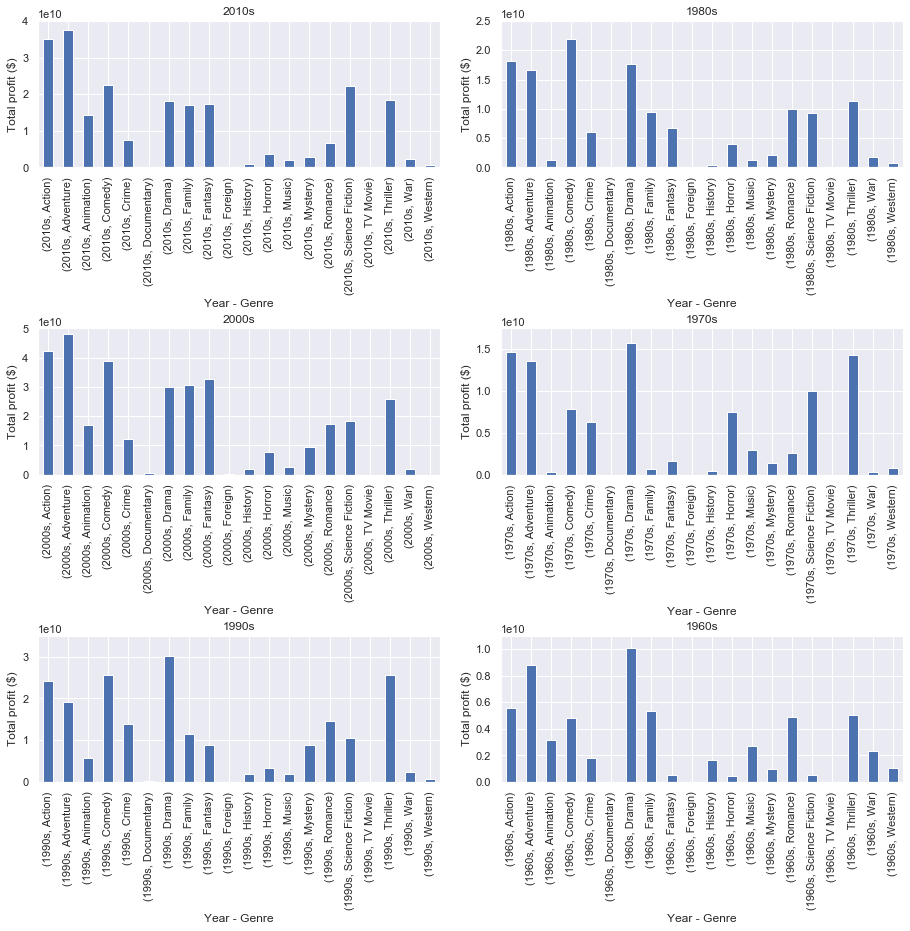

In [66]:
fig, axes = plt.subplots(3, 2)
fig.subplots_adjust(hspace=1.1, wspace=0.15)

aa.plot(ax=axes[0,0], kind='bar', figsize=(15.5,14), title='2010s', ylim=([0,4e+10]))
bb.plot(ax=axes[1,0], kind='bar', title='2000s', ylim=([0,5e+10]))
cc.plot(ax=axes[2,0], kind='bar', title='1990s', ylim=([0,3.5e+10]))
dd.plot(ax=axes[0,1], kind='bar', title='1980s', ylim=([0,2.5e+10]))
ee.plot(ax=axes[1,1], kind='bar', title='1970s', ylim=([0,1.75e+10]))
ff.plot(ax=axes[2,1], kind='bar', title='1960s', ylim=([0,1.1e+10]))

for ax in axes.flat:
    ax.set(xlabel='Year - Genre', ylabel='Total profit ($)');

We can notice that total profits per decade have a very similar trend to total revenues per decade. Also, there are negative profit values for some movies - which we haven't plot here - that means that some movies had higher budgets than revenues.

### Research Question 4: Which are the most popular movies each year?

Similarly as we did with movies with highest revenue per year, we can look into which are the most popular movies per year.

In [67]:
temp4 = DF_Genre[DF_Genre.groupby(['release_year']).popularity.transform(max) == DF_Genre.popularity]
temp4.head()

,popularity,original_title,director,vote_count,release_year,budget_adj,revenue_adj,genre,decade,profit
0,32.985763,Jurassic World,Colin Trevorrow,5562,2015,1.379999e+08,1.392446e+09,Action,2010s,1.254446e+09
1,32.985763,Jurassic World,Colin Trevorrow,5562,2015,1.379999e+08,1.392446e+09,Adventure,2010s,1.254446e+09
2,32.985763,Jurassic World,Colin Trevorrow,5562,2015,1.379999e+08,1.392446e+09,Science Fiction,2010s,1.254446e+09
3,32.985763,Jurassic World,Colin Trevorrow,5562,2015,1.379999e+08,1.392446e+09,Thriller,2010s,1.254446e+09
1381,24.949134,Interstellar,Christopher Nolan,6498,2014,1.519800e+08,5.726906e+08,Adventure,2010s,4.207106e+08


In [68]:
temp5 = temp4.groupby(['release_year']).max()[['genre','popularity']] #.plot(kind='bar', figsize=(15,5))
temp5.head()

,genre,popularity
release_year,,
1960,Thriller,2.610362
1961,Family,2.631987
1962,Thriller,3.170651
1963,Thriller,2.508235
1964,Thriller,3.153791


In [69]:
temp6 = temp5.set_index(['genre'],append=True)

In [70]:
temp6.head()

,,popularity
release_year,genre,
1960,Thriller,2.610362
1961,Family,2.631987
1962,Thriller,3.170651
1963,Thriller,2.508235
1964,Thriller,3.153791


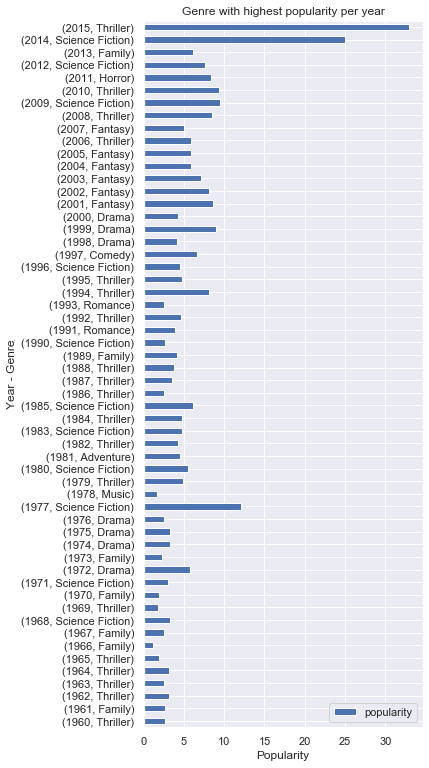

In [71]:
ax = temp6.plot(kind='barh', figsize=(5,13), title="Genre with highest popularity per year")
ax.set_ylabel('Year - Genre')
ax.set_xlabel('Popularity');

In the following figure we plot together the genre with highest revenue per year (plotted earlier) and the genre with the highest popularity per year.

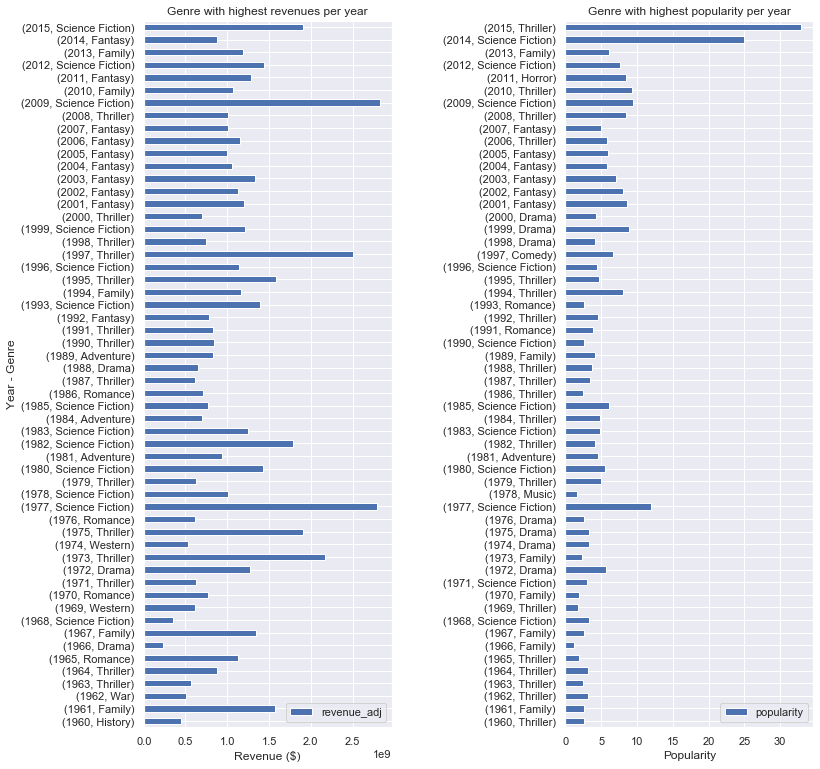

In [72]:
fig, axes = plt.subplots(1, 2)
fig.subplots_adjust(hspace=0.3, wspace=0.7)

temp3.plot(ax=axes[0],kind='barh', figsize=(12,13), title='Genre with highest revenues per year')
temp6.plot(ax=axes[1], kind='barh', title='Genre with highest popularity per year')
axes[0].set(xlabel='Revenue ($)', ylabel='Year - Genre')
axes[1].set(xlabel='Popularity', ylabel='');

We notice that for a good number of years the genre that had the highest popularity also had the highest revenue. For example, from 2001 to 2005 a fantacy movie was the most popular one and also a fantacy movie had the highest revenue. We can look if that is the same movie.

In [73]:
temp1[(temp1.genre=='Fantasy')&((temp1.release_year==2001)|(temp1.release_year==2002)|(temp1.release_year==2003)|(temp1.release_year==2004)|(temp1.release_year==2005))]

,popularity,original_title,director,vote_count,release_year,budget_adj,revenue_adj,genre
6111,8.021423,Harry Potter and the Philosopher's Stone,Chris Columbus,4265,2001,1.539360e+08,1.202518e+09,Fantasy
9268,8.095275,The Lord of the Rings: The Two Towers,Peter Jackson,5114,2002,9.576865e+07,1.122902e+09,Fantasy
11780,7.122455,The Lord of the Rings: The Return of the King,Peter Jackson,5636,2003,1.114231e+08,1.326278e+09,Fantasy
14686,5.939927,Harry Potter and the Goblet of Fire,Mike Newell,3406,2005,1.674845e+08,1.000353e+09,Fantasy
16711,2.191033,Shrek 2,Andrew Adamson|Kelly Asbury|Conrad Vernon,1676,2004,1.731668e+08,1.061904e+09,Fantasy


In [74]:
temp4[(temp4.genre=='Fantasy')&((temp4.release_year==2001)|(temp4.release_year==2002)|(temp4.release_year==2003)|(temp4.release_year==2004)|(temp4.release_year==2005))]

,popularity,original_title,director,vote_count,release_year,budget_adj,revenue_adj,genre,decade,profit
6108,8.575419,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,6079,2001,1.145284e+08,1.073080e+09,Fantasy,2000s,9.585514e+08
9268,8.095275,The Lord of the Rings: The Two Towers,Peter Jackson,5114,2002,9.576865e+07,1.122902e+09,Fantasy,2000s,1.027134e+09
11780,7.122455,The Lord of the Rings: The Return of the King,Peter Jackson,5636,2003,1.114231e+08,1.326278e+09,Fantasy,2000s,1.214855e+09
14686,5.939927,Harry Potter and the Goblet of Fire,Mike Newell,3406,2005,1.674845e+08,1.000353e+09,Fantasy,2000s,8.328680e+08
16665,5.827781,Harry Potter and the Prisoner of Azkaban,Alfonso CuarÃ³n,3550,2004,1.500779e+08,9.117862e+08,Fantasy,2000s,7.617083e+08


We actually see that for 3 out of 5 years, the most popular movie was also the one with the highest revenues - from 2001 to 2005. All these are indeed very famous, popular movies and it makes sense that resulted in high revenues as well. Some future work could be to see in detail all the years.

### Research Question 5: Which directors have the highest revenues?

In [75]:
# First I am looking into the director column to see if there are movies with multiple directors
df.director.str.contains('\|').sum()

749

Indeed it looks like 749 rows have multiple directors. We will follow a similar solution like before in the genres and split the movies with many directors into multiple rows.

In [76]:
DF_Director = df.join(df.director.str.strip('|').str.split('|',expand=True).stack().reset_index(level=1,drop=True).rename('director_new')).reset_index(drop=True)

In [77]:
DF_Director.head()

,popularity,original_title,director,genres,vote_count,release_year,budget_adj,revenue_adj,director_new
0,32.985763,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,2015,1.379999e+08,1.392446e+09,Colin Trevorrow
1,28.419936,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,2015,1.379999e+08,3.481613e+08,George Miller
2,13.112507,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,2015,1.012000e+08,2.716190e+08,Robert Schwentke
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,2015,1.839999e+08,1.902723e+09,J.J. Abrams
4,9.335014,Furious 7,James Wan,Action|Crime|Thriller,2947,2015,1.747999e+08,1.385749e+09,James Wan


In [78]:
# I can drop the director column and keep only the new one.
DF_Director.drop('director', axis=1, inplace=True)

In [79]:
DF_Director.head()

,popularity,original_title,genres,vote_count,release_year,budget_adj,revenue_adj,director_new
0,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,2015,1.379999e+08,1.392446e+09,Colin Trevorrow
1,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,2015,1.379999e+08,3.481613e+08,George Miller
2,13.112507,Insurgent,Adventure|Science Fiction|Thriller,2480,2015,1.012000e+08,2.716190e+08,Robert Schwentke
3,11.173104,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,2015,1.839999e+08,1.902723e+09,J.J. Abrams
4,9.335014,Furious 7,Action|Crime|Thriller,2947,2015,1.747999e+08,1.385749e+09,James Wan


In [80]:
DF_Director.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11855 entries, 0 to 11854
Data columns (total 8 columns):
popularity        11855 non-null float64
original_title    11855 non-null object
genres            11855 non-null object
vote_count        11855 non-null int64
release_year      11855 non-null int64
budget_adj        11855 non-null float64
revenue_adj       11855 non-null float64
director_new      11855 non-null object
dtypes: float64(3), int64(2), object(3)
memory usage: 741.0+ KB


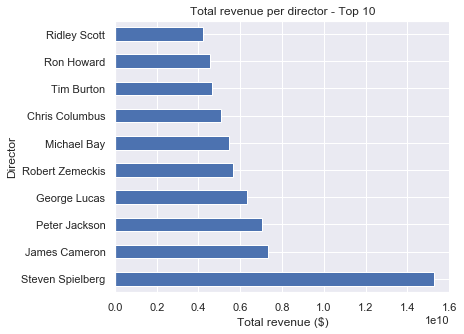

In [81]:
# Total revenues per director
a1 = DF_Director.groupby('director_new').sum().revenue_adj.sort_values(ascending=False).head(10)
a1.plot(kind='barh',figsize=(6,5))
plt.title("Total revenue per director - Top 10")
plt.xlabel("Total revenue ($)")
plt.ylabel("Director");

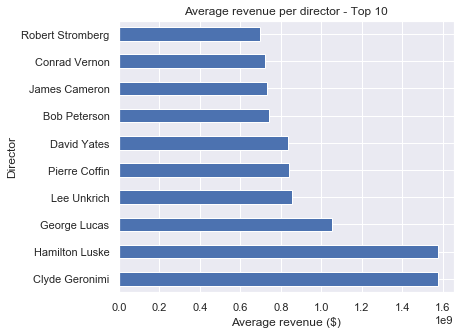

In [82]:
# Average revenues per director
DF_Director.groupby('director_new').mean().revenue_adj.sort_values(ascending=False).head(10).plot(kind='barh',figsize=(6,5))
plt.title("Average revenue per director - Top 10")
plt.xlabel("Average revenue ($)")
plt.ylabel("Director");

We see that we get a totally different outcome when we take the sum revenues per director and the mean revenues per director. Maybe that has to do with the number of movies of each director. I can explore that.

In [83]:
DF_Director.director_new.value_counts().head(10)

Woody Allen          46
Clint Eastwood       34
Martin Scorsese      31
Steven Spielberg     30
Steven Soderbergh    23
Ridley Scott         23
Ron Howard           22
Joel Schumacher      21
Tim Burton           20
Brian De Palma       20
Name: director_new, dtype: int64

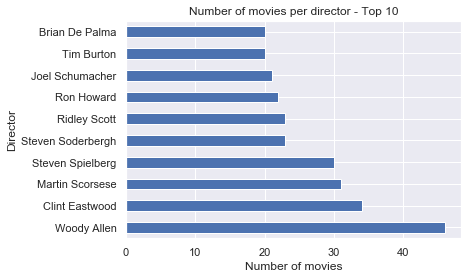

In [84]:
# plot number of movies for top directors
b1 = DF_Director.director_new.value_counts().head(10)
b1.plot(kind='barh')
plt.title("Number of movies per director - Top 10")
plt.xlabel("Number of movies")
plt.ylabel("Director");

Woodly Allen is by far the most productive director. Also, we can indeed see that the directors with many movies do not appear in the top 10 average revenue per director graph. While some of the names appear at the top 10 total revenues per director graph. We can check the number of movies for the top 10 average revenue directors.

In [85]:
DF_Director[(DF_Director.director_new=='Clyde Geronimi')|(DF_Director.director_new=='Hamilton Luske')|(DF_Director.director_new=='George Lucas')|(DF_Director.director_new=='David Yates')|(DF_Director.director_new=='Pierre Coffin')|(DF_Director.director_new=='Joss Whedon')|(DF_Director.director_new=='Lee Unkrich')|(DF_Director.director_new=='James Cameron')|(DF_Director.director_new=='Colin Trevorrow')|(DF_Director.director_new=='Bob Peterson')].director_new.value_counts()

James Cameron      10
George Lucas        6
David Yates         5
Joss Whedon         5
Lee Unkrich         4
Pierre Coffin       3
Colin Trevorrow     2
Clyde Geronimi      1
Bob Peterson        1
Hamilton Luske      1
Name: director_new, dtype: int64

We see, for example, that Clyde Geronimi, Bob Peterson and Hamilton Luske have produced only one movie. And that movie resulted in very high revenues. So it was a one time big sucess. We can look further into the dataset to see which are these movies.

In [86]:
DF_Director[(DF_Director.director_new=='Clyde Geronimi')].original_title

11049    One Hundred and One Dalmatians
Name: original_title, dtype: object

In [87]:
DF_Director[(DF_Director.director_new=='Bob Peterson')].original_title

1549    Up
Name: original_title, dtype: object

In [88]:
DF_Director[(DF_Director.director_new=='Hamilton Luske')].original_title

11050    One Hundred and One Dalmatians
Name: original_title, dtype: object

Intrestingly Hamilton Luske and Clyde Geronimi had a one time sucess with the movie "One Hundred and One Dalmatians".

We can also notice from the last two plots that some directors appear to be in both plots. I can also look into them.

In [89]:
DF_Director[(DF_Director.director_new=='Lee Unkrich')].original_title

2139       Toy Story 3
2685       Toy Story 2
2919    Monsters, Inc.
5468      Finding Nemo
Name: original_title, dtype: object

In [90]:
DF_Director[(DF_Director.director_new=='George Lucas')].original_title

1483                                        Star Wars
2672        Star Wars: Episode I - The Phantom Menace
4324     Star Wars: Episode II - Attack of the Clones
6844     Star Wars: Episode III - Revenge of the Sith
10862                                        THX 1138
11580                               American Graffiti
Name: original_title, dtype: object

Indeed, these directors had a small number of movies, but with high sucesss resulted in high revenues (both in total and on average).

It might be interesting to see the average revenues per director, only for the directors that have produced equal or more than 10 movies.

In [91]:
# number of directors with >=10 movies
(DF_Director.director_new.value_counts()>=10).sum()

133

C:\Users\pallasg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


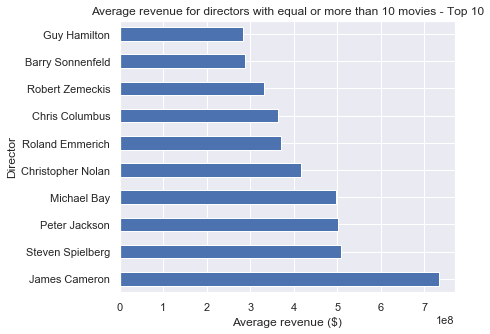

In [92]:
c1 = DF_Director.groupby('director_new').mean()[DF_Director.director_new.value_counts()>=10].revenue_adj.sort_values(ascending=False).head(10)
c1.plot(kind='barh', figsize=(6,5))
plt.title("Average revenue for directors with equal or more than 10 movies - Top 10")
plt.xlabel("Average revenue ($)")
plt.ylabel("Director");

We see now a more clear picture of top directors. While in the first plot, Steven Spielberg was the one with the highest total revenues by far, on average is behind James Cameron. Probably James Cameron has less number of movies than Steven Spielberg but with high revenues.

### Research Question 6: Which directors have the highest and lowest profits?

As we did before I will create a new column profit subtructing the budget from the revenue.

In [93]:
DF_Director.head()

,popularity,original_title,genres,vote_count,release_year,budget_adj,revenue_adj,director_new
0,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,2015,1.379999e+08,1.392446e+09,Colin Trevorrow
1,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,2015,1.379999e+08,3.481613e+08,George Miller
2,13.112507,Insurgent,Adventure|Science Fiction|Thriller,2480,2015,1.012000e+08,2.716190e+08,Robert Schwentke
3,11.173104,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,2015,1.839999e+08,1.902723e+09,J.J. Abrams
4,9.335014,Furious 7,Action|Crime|Thriller,2947,2015,1.747999e+08,1.385749e+09,James Wan


In [94]:
DF_Director['profit'] = DF_Director.revenue_adj - DF_Director.budget_adj

In [95]:
DF_Director.head()

,popularity,original_title,genres,vote_count,release_year,budget_adj,revenue_adj,director_new,profit
0,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,2015,1.379999e+08,1.392446e+09,Colin Trevorrow,1.254446e+09
1,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,2015,1.379999e+08,3.481613e+08,George Miller,2.101614e+08
2,13.112507,Insurgent,Adventure|Science Fiction|Thriller,2480,2015,1.012000e+08,2.716190e+08,Robert Schwentke,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,2015,1.839999e+08,1.902723e+09,J.J. Abrams,1.718723e+09
4,9.335014,Furious 7,Action|Crime|Thriller,2947,2015,1.747999e+08,1.385749e+09,James Wan,1.210949e+09


In [96]:
DF_Director.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11855 entries, 0 to 11854
Data columns (total 9 columns):
popularity        11855 non-null float64
original_title    11855 non-null object
genres            11855 non-null object
vote_count        11855 non-null int64
release_year      11855 non-null int64
budget_adj        11855 non-null float64
revenue_adj       11855 non-null float64
director_new      11855 non-null object
profit            11855 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 833.6+ KB


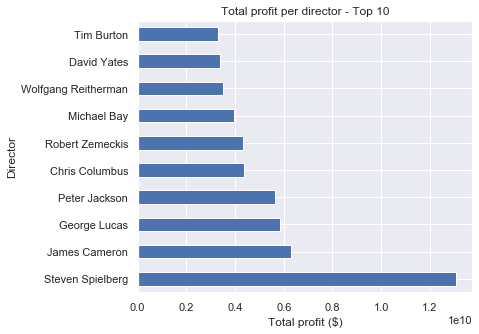

In [97]:
# sum of profits for top 10 directors
a2 = DF_Director.groupby('director_new').sum().profit.sort_values(ascending=False).head(10)
a2.plot(kind='barh',figsize=(6,5))
plt.title("Total profit per director - Top 10")
plt.xlabel("Total profit ($)")
plt.ylabel("Director");

We can see that this plot with top 10 directors by profits is very similar to the one with top 10 directors by revenues.

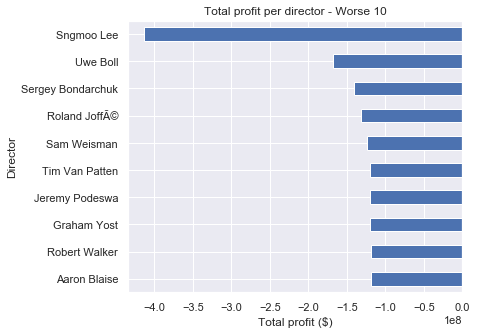

In [98]:
# sum of profits for worse 10 directors
a3 = DF_Director.groupby('director_new').sum().profit.sort_values(ascending=False).tail(10)
a3.plot(kind='barh',figsize=(6,5))
plt.title("Total profit per director - Worse 10")
plt.xlabel("Total profit ($)")
plt.ylabel("Director");

### Research Question 7: Which directors have the highest budgets?

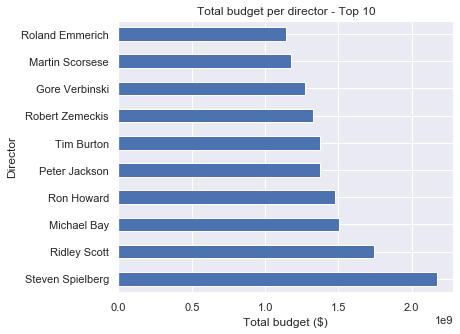

In [99]:
# sum of budget for top 10 directors
a4 = DF_Director.groupby('director_new').sum().budget_adj.sort_values(ascending=False).head(10)
a4.plot(kind='barh',figsize=(6,5))
plt.title("Total budget per director - Top 10")
plt.xlabel("Total budget ($)")
plt.ylabel("Director");

We can see that Steven Spielberg also had the highest budgets in total. We can plot all the graphs together to have a more clear picture.

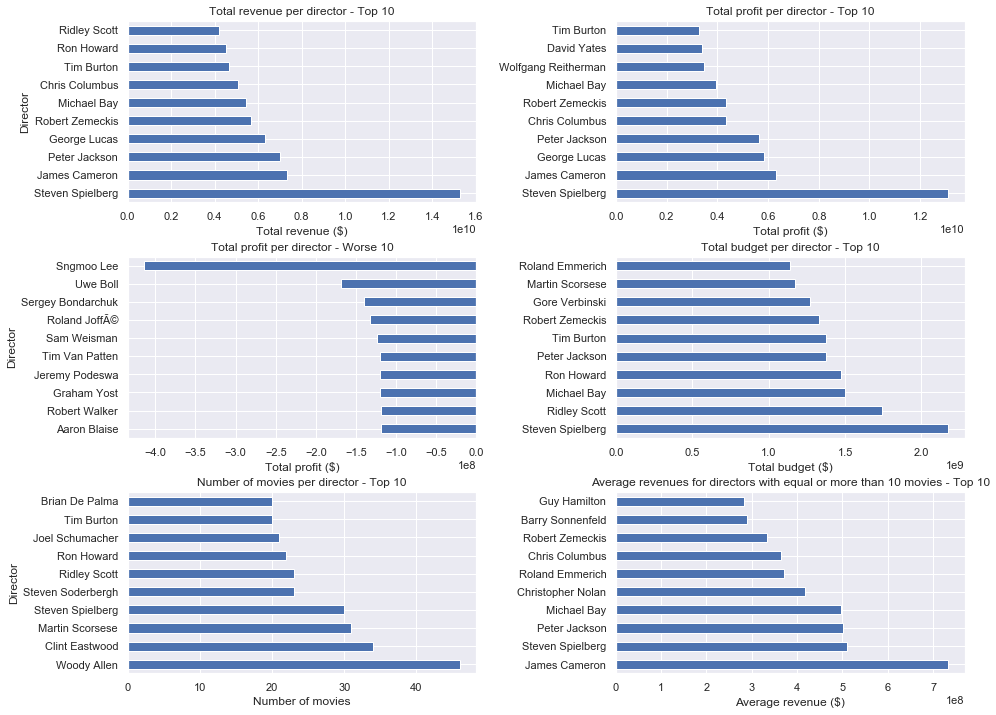

In [100]:
fig, axes = plt.subplots(3, 2)
fig.subplots_adjust(hspace=0.3, wspace=0.4)

a1.plot(ax=axes[0,0], kind='barh', figsize=(15,12), title='Total revenue per director - Top 10')
a2.plot(ax=axes[0,1], kind='barh', title='Total profit per director - Top 10')
a3.plot(ax=axes[1,0], kind='barh', title='Total profit per director - Worse 10')
a4.plot(ax=axes[1,1], kind='barh', title='Total budget per director - Top 10')
b1.plot(ax=axes[2,0], kind='barh', title='Number of movies per director - Top 10')
c1.plot(ax=axes[2,1], kind='barh', title='Average revenues for directors with equal or more than 10 movies - Top 10')

axes[0,0].set(xlabel='Total revenue ($)', ylabel='Director')
axes[0,1].set(xlabel='Total profit ($)', ylabel='')
axes[1,0].set(xlabel='Total profit ($)', ylabel='Director')
axes[1,1].set(xlabel='Total budget ($)', ylabel='')
axes[2,0].set(xlabel='Number of movies', ylabel='Director')
axes[2,1].set(xlabel='Average revenue ($)', ylabel='');

We can see that the two plots of total revenues and total profits per director are quite similar with small changes. Steven Spielberg is by far the director with the highest total revenues and profits followed by James Cameron.

When we look at the total budget plot, Steven Spielbeg is again on the top of the least. Ridley Scott is second on total budget. However, Ridley Scott is not on the top 10 list by total revenues and profits. That implies that although the total budget spend in the movies he directed it quite high that does not result in that high revenues and profits.

When we look at the number of movies plot, the most productive director is Woody Allen with more than 45 movies, which is quite impressive. It is almost as he produced one movie per year for his whole working life. He does not appear though in the plots of top 10 revenues and profits. That implies that the movies haven't had high revenues. However, he also does not appear in the list of the highest budgets. That also implies that many of his movies were low budget compared to other directors.

Lastly, if we look at the average revenues of top directors with more or equal than 10 movies (excluding those that might had a very big success with a few movies only resulting in high average), James Cameron is on the top of the list followed by Steven Spielberg.

### Research Question 8: How the top directors with highest revenues are assossiated with the number of movies?

I will try to present here in two graphs:
- the top 10 directors by number of movies plotted together with total revenues
- the top 10 directors by total revenues plotted together with number of movies

In [101]:
movies_per_director = DF_Director.director_new.value_counts()
movies_per_director.head()

Woody Allen          46
Clint Eastwood       34
Martin Scorsese      31
Steven Spielberg     30
Steven Soderbergh    23
Name: director_new, dtype: int64

In [102]:
movies_per_director = movies_per_director.to_frame()

In [103]:
movies_per_director.rename(columns={"director_new":"movies_number"}, inplace=True)

In [104]:
# I have created a dataframe for the number of movies per director
movies_per_director.head()

,movies_number
Woody Allen,46
Clint Eastwood,34
Martin Scorsese,31
Steven Spielberg,30
Steven Soderbergh,23


In [105]:
revenue_per_director = DF_Director.groupby('director_new').sum().revenue_adj

In [106]:
revenue_per_director = revenue_per_director.to_frame()

In [107]:
# I have created a dataframe with total revenues per director
revenue_per_director.head()

,revenue_adj
director_new,
FrÃ©dÃ©ric Jardin,3.255239e+03
A. Todd Smith,0.000000e+00
A.R. Murugadoss,7.697178e+07
Aaron Aites,0.000000e+00
Aaron Blaise,2.963382e+02


In [108]:
# I merge the two dataframes together
movies_revenues_per_director = pd.merge(movies_per_director, revenue_per_director, left_index=True, right_index=True)

In [109]:
movies_revenues_per_director.head()

,movies_number,revenue_adj
Woody Allen,46,1.294220e+09
Clint Eastwood,34,3.659689e+09
Martin Scorsese,31,2.426542e+09
Steven Spielberg,30,1.526692e+10
Steven Soderbergh,23,2.475274e+09


In [110]:
# I devide the value to have it in a number of million dollars
movies_revenues_per_director.revenue_adj = movies_revenues_per_director.revenue_adj/1000000

In [111]:
movies_revenues_per_director.head()

,movies_number,revenue_adj
Woody Allen,46,1294.220407
Clint Eastwood,34,3659.689202
Martin Scorsese,31,2426.541981
Steven Spielberg,30,15266.924037
Steven Soderbergh,23,2475.273703


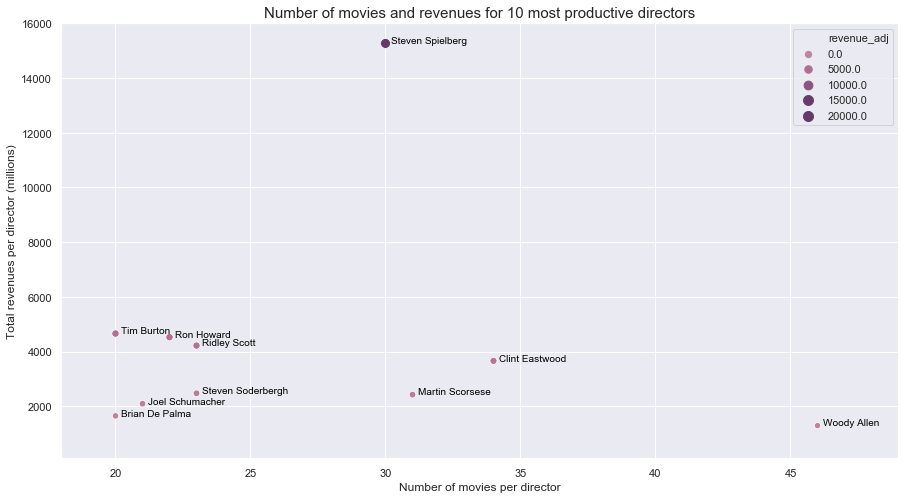

In [112]:
# plot top 10 directors by number of movies together with their total revenues
plt.subplots(figsize=(15,8))
cmap = sns.cubehelix_palette(dark=.3, light=.6, as_cmap=True)
ax = sns.scatterplot(data=movies_revenues_per_director.head(10), x="movies_number", y="revenue_adj", marker="o", color="skyblue", size="revenue_adj", hue="revenue_adj", palette=cmap, sizes=(40,100))
plt.title("Number of movies and revenues for 10 most productive directors", fontdict={'fontsize':15})
ax.set_xlim(18,49)
ax.set_ylim(100,16000)
plt.xlabel("Number of movies per director")
plt.ylabel("Total revenues per director (millions)")

for line in range(0,movies_revenues_per_director.head(10).shape[0]):
     ax.text(movies_revenues_per_director.movies_number[line]+0.2, movies_revenues_per_director.revenue_adj[line], movies_revenues_per_director.index[line], horizontalalignment='left', size='medium', color='black')

We can see in the plot that Steven Spielberg is by far the director with highest revenues. Woody Allen although has directed a large number of movies the revenues are not that high as already discussed before.

In [113]:
temp7 = movies_revenues_per_director.sort_values('revenue_adj', ascending=False).head(10)
temp7

,movies_number,revenue_adj
Steven Spielberg,30,15266.924037
James Cameron,10,7327.220858
Peter Jackson,14,7019.847816
George Lucas,6,6313.919163
Robert Zemeckis,17,5655.648249
Michael Bay,11,5460.671958
Chris Columbus,14,5094.077226
Tim Burton,20,4660.141182
Ron Howard,22,4527.095482
Ridley Scott,23,4219.565978


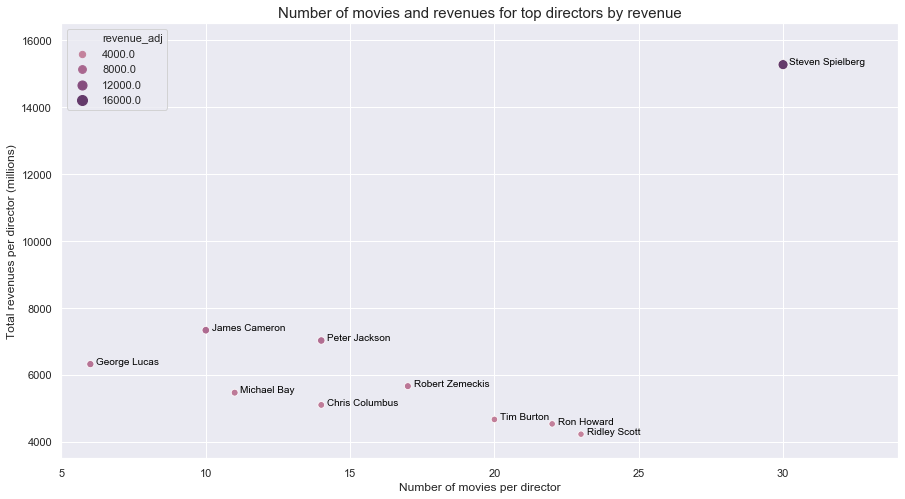

In [114]:
# plot top 10 directors by revenue together with their number of movies
plt.subplots(figsize=(15,8))
cmap = sns.cubehelix_palette(dark=.3, light=.6, as_cmap=True)
ax = sns.scatterplot(data=temp7, x="movies_number", y="revenue_adj", marker="o", color="skyblue", size="revenue_adj", hue="revenue_adj", palette=cmap, sizes=(40,100))
plt.title("Number of movies and revenues for top directors by revenue", fontdict={'fontsize':15})
plt.legend(loc='upper left')
ax.set_xlim(5,34)
ax.set_ylim(3500,16500)
plt.xlabel("Number of movies per director")
plt.ylabel("Total revenues per director (millions)")

for line in range(0,movies_revenues_per_director.sort_values('revenue_adj', ascending=False).head(10).shape[0]):
     ax.text(temp7.movies_number[line]+0.2, temp7.revenue_adj[line], temp7.index[line], horizontalalignment='left', size='medium', color='black')

We can see the Steven Spielberg is by far the director with highest revenues. Compared to the rest top 9 directors with high revenues, Steven Spielberg has produced more movies. However, the total revenues of Spielberg are impressive. We can also observe something we noticed earlier. On average, James Cameron has higher revenues. We can see here that Spielberg has directed 3 times more movies compared to Cameron. However, the total revenues from these movies are not 3 times higher, making Cameron the director with highest average revenues - as discussed earlier -.

<a id='conclusions'></a>
## Conclusions

##### Exploratory analysis

In this project I presented the findings from the exploratory analysis I performed for the movies dataset.

First, I looked into the data to find which questions I would like to explore.

Secondly, I cleaned the data and selected which variables I will use for my analysis.

Then, I looked into the correlation of specific variables - popularity, budget and vote_count - with revenues, finding out that all of these variables are positively correlated with revenues.

Furthermore, I looked into the relationship between genres-popularity, genres-revenues and genres-profits.
I looked into which genres are most popular per year and also which genres have the highest revenues per year. I plot these two together to see if the most popular genres also result in highest revenues per genre per year. Indeed, there is some correlation there, but ideally a more detailed analysis should take place; in order to explore if in the years in which the same genre is both the most popular one and the one with the highest revenues, that also happends to be the same movie.
In addition, I looked into the relationship between genres and revenues and profit not only per year but also per decade. That is quite interesting in order to see which are the genres with highest profits and revenues per decade.

Then I looked into the directors. Who are the ones with highest revenues, highest and lowest profits, highest budgets and the most productive ones. I also looked into total values and average values. Results showed that some directors are very sucesful in terms of revenues and profits, others are very productive, while others do not appear to perform that well in terms of budgets and revenues, as discussed in more detailed in the relevant sectons.

##### Limitations

It would be interesting to more carefully look into revenues and profits using both sum values and mean values.
For example, in the case of genre I looked into the sum revenues and profits while looking into mean values might reveal some different outcomes.

Another limitation is that I did not go deeply into identifying if when the most popular genre per year and genre with highest revenue per year is the same that is actually due to the same movie or just a coincidence. I only did that for a 5 year period, but it would be more interesting to do it for the whole time period.

Other limitations are that I didn't use some variables in my analysis like production companies or cast which are very likely to have a strong relationship with revenues or popularity. Also there are many other variables of interest like release date, vote count and other variables to explore. For example, the vote count seems to have a high positive correlation with revenues, so it would be interesting to look into that in more detail.

Lastly, in the dataset many movies have zero budgets and revenues. I have not removed any of them. However, there might be some erroneous data there that it would be interesting to look into them.